## 1. Data PreProcessing

In [64]:
import pandas as pd
df = pd.read_csv(r"C:\Users\kezya_sxr\OneDrive\Desktop\KEZYA\ML\LAB\Lab 7\insurance (1).csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [66]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [67]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [68]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [69]:
print( "region cl before encoding", df["region"].unique())
print( "sex cl before encoding", df["sex"]. unique())
print( "smoker cl before encoding", df["smoker"].unique())

region cl before encoding ['southwest' 'southeast' 'northwest' 'northeast']
sex cl before encoding ['female' 'male']
smoker cl before encoding ['yes' 'no']


In [70]:
from sklearn import preprocessing
label_enc = preprocessing.LabelEncoder()
df["region"] = label_enc.fit_transform(df["region"])
df["sex"] = label_enc.fit_transform(df["sex"])
df["smoker"] = label_enc.fit_transform(df["smoker"])
print( "region cl after encoding", df["region"].unique())
print( "sex cl after encoding", df["sex"]. unique())
print( "smoker cl after encoding", df["smoker"].unique())



region cl after encoding [3 2 1 0]
sex cl after encoding [0 1]
smoker cl after encoding [1 0]


In [71]:
print("unique bmi values", df['bmi'].unique())
print("unique age values", df['age'].unique())

unique bmi values [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34.7   26.505
 22.04  35.9   25.555 28.05  25.175 31.9   36.    32.49  25.3   29.735
 38.83  30.495 37.73  37.43  24.13  37.145 39.52  24.42  27.83  36.85
 39

- **BMI has a wider range and contains outliers so we choose Standardizing i.e StandardScalar**

- **Age has a relatively narrow range (18 to 64), and the values are naturally bounded. Hence we choose MinMax**

In [72]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
std_scl = StandardScaler()
min_max = MinMaxScaler()


In [73]:
df['bmi'] = std_scl.fit_transform(df[['bmi']])
df['age'] = min_max.fit_transform(df[['age']])

In [74]:
print("unique bmi values", df['bmi'].unique())
print("unique age values", df['age'].unique())


unique bmi values [-4.53320001e-01  5.09621097e-01  3.83306847e-01 -1.30553108e+00
 -2.92556411e-01 -8.07656079e-01  4.55486418e-01 -4.79567118e-01
 -1.36714155e-01 -7.91251631e-01 -7.28914728e-01 -7.17431614e-01
  6.12969119e-01  1.50209020e+00  1.88103295e+00 -9.94666786e-01
  1.91281013e-02 -1.11852037e+00  1.58083155e+00  7.60609152e-01
  8.76260510e-01  2.84880159e-01  5.63755775e-01  2.06138809e-01
 -4.32814441e-01 -4.82848008e-01 -1.24319417e+00  3.46396839e-01
 -2.17824771e+00  9.24653632e-01  8.09822496e-01 -7.13330502e-01
 -3.38488865e-01 -3.86061765e-01  9.41058080e-01 -1.67955249e+00
  3.77565290e-01 -1.61803581e+00  9.85350089e-01  1.51521376e+00
 -6.66577826e-01  9.78788310e-01 -1.45727222e+00  2.24089909e-02
  1.04768699e+00  1.08869811e+00  1.31261883e+00  6.73665577e-01
 -1.00614990e+00  7.44204704e-01  8.13923608e-01  4.86654870e-01
 -4.36915553e-01  6.17890454e-01 -3.23724862e-01  1.03210277e+00
  1.90554583e-01  1.66768133e-01 -1.27682329e+00  1.09443967e+00
 -5.419

## 2. Linear Regression Model Development

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [76]:

X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]  # Independent variables
y = df['charges']  # Target variable (insurance cost)

In [77]:
X_with_constant = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]

print("VIF values:\n", vif_data)

VIF values:
     Feature       VIF
0     const  7.288068
1       age  1.015394
2       sex  1.008889
3       bmi  1.040608
4  children  1.002482
5    smoker  1.006466
6    region  1.025966


-**Variance Inflation Factor (VIF) is used to detect multicollinearity among independent variables. Multicollinearity occurs when one feature can be predicted from the others, which can destabilize the model's coefficients.**

-**VIF values for all the variables were close to 1, meaning there is no significant multicollinearity among the features. This suggests that the selected features are not strongly correlated with each other and are suitable for the model**

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [80]:
y_pred = lin_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.7833463107364538
Mean Squared Error: 33635210.43117841


- **R-squared = 0.7833**: This value indicates that 78.33% of the variance in the insurance charges can be explained by the selected features. A high R-squared value suggests that the model is a good fit for the data, though it doesn’t guarantee that the model is perfect. Approximately 21.67% of the variance in charges is not captured by this model, which could be due to factors not included in the dataset.

- **Mean Squared Error (MSE) = 33,635,210:** This represents the average squared difference between the actual and predicted insurance charges. A lower MSE indicates better performance. In this case, the MSE value is relatively large, which means that while the model captures the general trend well (as indicated by the R-squared value), the individual predictions may have a considerable average error.

## 3. Model Evaluation

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

rss = np.sum((y_test - y_pred) ** 2)

explained_var = explained_variance_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")
print(f"Adjusted R-squared: {adj_r2}")
print(f"Residual Sum of Squares (RSS): {rss}")
print(f"Explained Variance Score: {explained_var}")


Mean Absolute Error (MAE): 4186.508898366434
Mean Squared Error (MSE): 33635210.43117841
Root Mean Squared Error (RMSE): 5799.587091438356
R-squared (R2) Score: 0.7833463107364538
Adjusted R-squared: 0.7783657661556826
Residual Sum of Squares (RSS): 9014236395.555815
Explained Variance Score: 0.7836717590532513


1. **Mean Absolute Error (MAE): 4186.51**  
   - On average, predictions deviate from actual charges by $4,186.51.

2. **Mean Squared Error (MSE): 33,635,210.43**  
   - The average squared error of predictions is approximately $33.64 million.

3. **Root Mean Squared Error (RMSE): 5,799.59**  
   - The error estimate, in the same units as the target variable, is about $5,799.59.

4. **R-squared (R²) Score: 0.7833**  
   - The model explains 78.33% of the variance in insurance charges.

5. **Adjusted R-squared: 0.7784**  
   - The adjusted R-squared value of 0.7784 confirms a strong model fit, accounting for the number of predictors.

6. **Residual Sum of Squares (RSS): 9,014,236,395.56**  
   - The total squared error in predictions amounts to $9.01 billion.

7. **Explained Variance Score: 0.7837**  
   - The model captures 78.37% of the variance in the target variable.

## 4. Feature Importance Analysis:

**Coeffecient Interpretation**

In [83]:
feature_names = X_train.columns

coefficients = lin_reg.coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})


print(coef_df)


    Feature   Coefficient
0       age  11824.588128
1       sex    -18.791457
2       bmi   2046.892957
3  children    425.091456
4    smoker  23647.818096
5    region   -271.284266


**age:** For each additional year of age, medical insurance costs increase by $11,824.59.

**sex:** Being female (encoded as 0) decreases medical insurance costs by $18.79 compared to being male.

**bmi:** For each additional unit of BMI, medical insurance costs increase by $2,046.89.

**children:** Each additional child increases medical insurance costs by $425.09.

**smoker:** Smokers incur $23,647.82 more in medical insurance costs compared to non-smokers.

**region:** Each unit increase in the region code decreases medical insurance costs by $271.28.

**Feature ranking**

In [85]:
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
ranked_features = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

print(ranked_features)


    Feature   Coefficient  Absolute Coefficient
4    smoker  23647.818096          23647.818096
0       age  11824.588128          11824.588128
2       bmi   2046.892957           2046.892957
3  children    425.091456            425.091456
5    region   -271.284266            271.284266
1       sex    -18.791457             18.791457


Smoking status has the highest impact on costs with an absolute coefficient of $23,647.82, followed by age ($11,824.59), BMI ($2,046.89), children ($425.09), region ($271.28), and sex ($18.79) with decreasing significance in that order.

## 5. Visualization

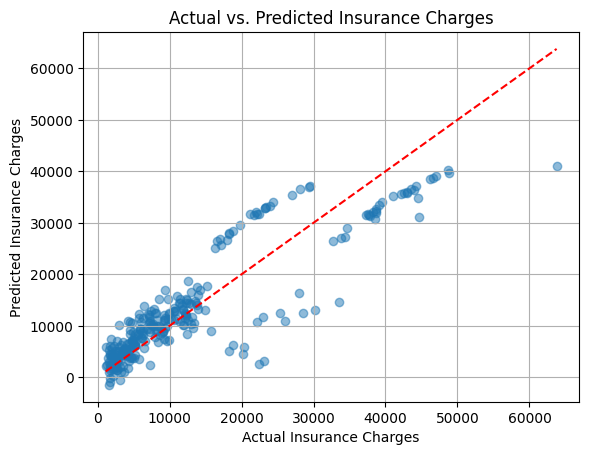

In [89]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect prediction
plt.xlabel('Actual Insurance Charges')
plt.ylabel('Predicted Insurance Charges')
plt.title('Actual vs. Predicted Insurance Charges')
plt.grid(True)
plt.show()


Closer points to the red line indicate better predictions, as the model's predictions closely match the actual insurance charges.

Points farther from the red line suggest the model's predictions deviate from the actual values, indicating potential prediction errors or variance in the model's accuracy for certain data points.


From the scatter plot, we can say
**The model is struggling to predict high insurance charges, as shown by the points far from the red line in the upper part of the graph. This suggests the model is too simple and cannot handle the more complex cases. When a model is too simple and misses important patterns, it's called underfitting.**


## 6. Residual analysis

**Residual:** A residual is the difference between the actual value and the predicted value from a model. Think of it as how much the model's prediction misses the mark.

**Residual Plot:** A residual plot is a graph that shows the residuals on the vertical axis and the predicted values (or sometimes the actual values, here we've taken the predicted values) on the horizontal axis. It's used to check if there are patterns in the residuals that might suggest problems with the model. If the residuals are randomly scattered around zero, it generally means the model is a good fit. If there’s a pattern, it might indicate that the model isn’t capturing something important.

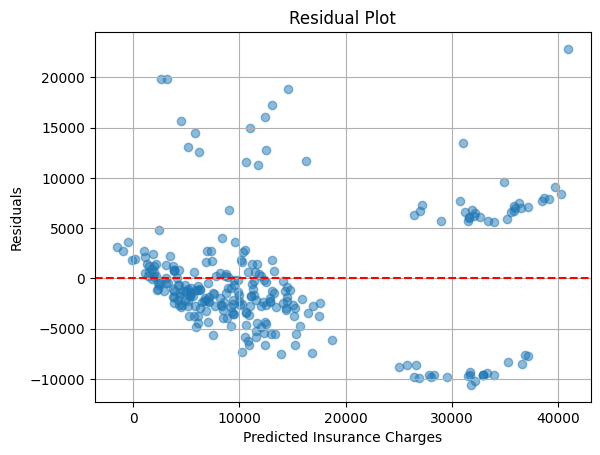

In [88]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0
plt.xlabel('Predicted Insurance Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


The dots should be spread randomly around the red line, but here, we see patterns. Hence our model needs to be improved